## Построение и сохранения графиков, нужных для отчета.
### Загрузим логи экспериментов:

In [3]:
import pickle
with open('GD_SGD_step_alpha_beta_batch_size.pkl', 'rb') as f:
    alpha_beta_bsize_logs = pickle.load(f)

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [93]:
keys_for_df = ['time', 'func', 'accuracy']

[]

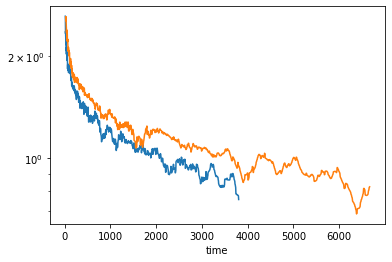

In [133]:
smooth_size = 50

hist_0_df = pd.DataFrame({key: alhpa_beta_bsize_logs[299][key] for key in keys_for_df})
hist_1_df = pd.DataFrame({key: alpha_beta_bsize_logs[300][key] for key in keys_for_df})
sns.lineplot(x = np.cumsum(np.cumsum(hist_0_df['time']))[smooth_size:-smooth_size], y=np.convolve(hist_0_df['func'], np.ones(smooth_size) / smooth_size, 'same')[smooth_size:-smooth_size])
sns.lineplot(x = np.cumsum(np.cumsum(hist_1_df['time']))[smooth_size:-smooth_size], y=np.convolve(hist_1_df['func'], np.ones(smooth_size) / smooth_size, 'same' )[smooth_size:-smooth_size])
plt.semilogy()
# plt.semilogx()


In [88]:
hist_1_df

,time,func,accuracy
0,0.001451,0.000000,0.000000
1,0.005782,24.914333,0.311031
2,0.005769,7.609684,0.702478
3,0.005806,3.405088,0.693770
4,0.005724,3.012115,0.679365
...,...,...,...
1495,0.005916,0.644004,0.890902
1496,0.005853,0.665247,0.907100
1497,0.005032,0.650543,0.883411
1498,0.005101,0.707481,0.902042
